In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

# Load Data

In [35]:
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures'
fileName = 'return-01-loss-max-01-within-day-droped-na.tsv'
featuresFile = f'{featuresRoot}\\{fileName}'
featured = read_tsv(featuresFile)\
    .query("date < '2017-09-15'")\
    .replace(np.inf, np.nan)\
    .replace(-np.inf, np.nan)\
    .dropna()\
    .reset_index()\
    .drop('index', axis=1)

In [36]:
featured.head()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
0,1425447000,5min,267.2200,267.2200,267.2200,267.2200,0.0000,0.0000,267.2200,2015-03-04 06:30:00,...,-0.1582,0.0663,-0.3142,0.0567,-2.4838,-0.8731,0.1008,0.8151,-0.7457,-0.8667
1,1425447300,5min,267.2200,267.2200,267.2200,267.2200,0.0000,0.0000,267.2200,2015-03-04 06:35:00,...,-0.1576,0.0689,-0.3079,0.0567,-2.4764,-0.8724,0.0944,0.8099,-0.7446,-0.8760
2,1425447600,5min,267.2200,267.2200,267.2200,267.2200,0.0000,0.0000,267.2200,2015-03-04 06:40:00,...,-0.1576,0.0712,-0.3017,0.0566,-2.4686,-0.8716,0.0878,0.8047,-0.7435,-0.8852
3,1425447900,5min,267.2200,267.2200,267.2200,267.2200,0.0000,0.0000,267.2200,2015-03-04 06:45:00,...,-0.1576,0.0733,-0.2955,0.0564,-2.4603,-0.8709,0.0812,0.7996,-0.7424,-0.8945
4,1425448200,5min,267.2200,267.2200,267.2200,267.2200,0.0000,0.0000,267.2200,2015-03-04 06:50:00,...,-0.1576,0.0752,-0.2893,0.0562,-2.4517,-0.8701,0.0746,0.7945,-0.7413,-0.9039


In [37]:
drop_cols = ['timestamp', 'period', 'open', 'high', 'low', 'close', 'volume',
       'quoteVolume', 'weightedAverage', 'date', 'maxReturn', 'tillMax',
       'minReturn', 'label']
X = featured
for col in drop_cols:
    X = X.drop(col, axis=1)
y = featured['label'].apply(int)

# Test Train Validation Split

In [39]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.33)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.33)

Text(0.5,1,'Test Distribution')

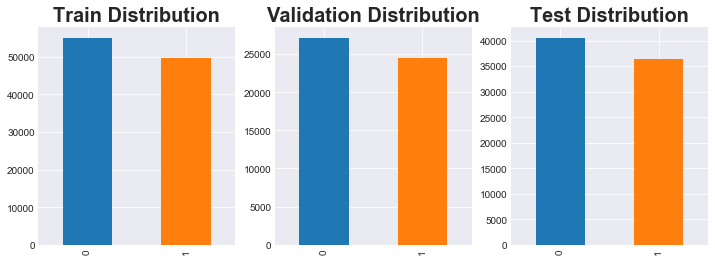

In [40]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font)

In [41]:
def write_split(root):
    write_tsv(X_train, f"{root}/X_train.tsv")
    write_tsv(y_train, f"{root}/y_train.tsv")
    write_tsv(X_val, f"{root}/X_val.tsv")
    write_tsv(y_val, f"{root}/y_val.tsv")
    write_tsv(X_test, f"{root}/X_test.tsv")
    write_tsv(y_test, f"{root}/y_test.tsv")
    
write_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\return-01-loss-max-01-within-day")